Build a regression model.

In [22]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind


#Load and view the dataset
# Read the CSV file into a DataFrame
csv_path = '/Users/hm4th/Downloads/merged_df2.csv'
merged_df2 = pd.read_csv(csv_path)

# Display the DataFrame
merged_df2

,name,review_count,categories,rating,price,distance,latitude,longitude,location,bike station,Location,free_bikes,id,latitude_bike_stations,longitude_bike_stations,rounded_lat_yelp,rounded_long_yelp,rounded_lat,rounded_long
0,Delina Restaurant,56,"[{'alias': 'mideastern', 'title': 'Middle East...",4.5,$,1045.239101,43.668640,-79.305170,1891 Queen Street E,5,"{'address': 'Queen St. E / Eastern Ave', 'alti...",9,973748f7f27229b41ca0d2a96dea777e,43.667208,-79.312315,43.67,-79.31,43.67,-79.31
1,Delina Restaurant,56,"[{'alias': 'mideastern', 'title': 'Middle East...",4.5,$,1045.239101,43.668640,-79.305170,1891 Queen Street E,9,"{'address': 'Orchard Park', 'altitude': 0.0, '...",10,675628c054189e3bce23785d6574a24d,43.669080,-79.314900,43.67,-79.31,43.67,-79.31
2,Delina Restaurant,56,"[{'alias': 'mideastern', 'title': 'Middle East...",4.5,$,1045.239101,43.668640,-79.305170,1891 Queen Street E,3,{'address': 'Queen St E and Joseph Duggan Rd -...,15,010507feed5b8d87c40cd95933ed5654,43.667763,-79.308117,43.67,-79.31,43.67,-79.31
3,Sauvignon Bistro,42,"[{'alias': 'newcanadian', 'title': 'Canadian (...",4.0,$$$,968.462956,43.668453,-79.307099,1862 Queen Street E,5,"{'address': 'Queen St. E / Eastern Ave', 'alti...",9,973748f7f27229b41ca0d2a96dea777e,43.667208,-79.312315,43.67,-79.31,43.67,-79.31
4,Sauvignon Bistro,42,"[{'alias': 'newcanadian', 'title': 'Canadian (...",4.0,$$$,968.462956,43.668453,-79.307099,1862 Queen Street E,9,"{'address': 'Orchard Park', 'altitude': 0.0, '...",10,675628c054189e3bce23785d6574a24d,43.669080,-79.314900,43.67,-79.31,43.67,-79.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,GG's,4,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.5,NaN,291.415216,43.663207,-79.310013,1681 Lake Shore Blvd E,14,{'address': 'Northern Dancer Blvd / Lake Shore...,12,be39936af5ab6b60d98a2d6756387909,43.663162,-79.309765,43.66,-79.31,43.66,-79.31
113,Toronto Beach Club,13,"[{'alias': 'mediterranean', 'title': 'Mediterr...",3.0,NaN,291.415216,43.663207,-79.310013,1681 Lake Shore Boulevard E,14,{'address': 'Northern Dancer Blvd / Lake Shore...,12,be39936af5ab6b60d98a2d6756387909,43.663162,-79.309765,43.66,-79.31,43.66,-79.31
114,Beach Club,19,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",3.0,NaN,291.415216,43.663207,-79.310013,1681 Lake Shore Boulevard E,14,{'address': 'Northern Dancer Blvd / Lake Shore...,12,be39936af5ab6b60d98a2d6756387909,43.663162,-79.309765,43.66,-79.31,43.66,-79.31
115,The Breakfast Club,1,"[{'alias': 'breakfast_brunch', 'title': 'Break...",2.0,$,291.415216,43.663207,-79.310013,1681 Lakeshore Ave E,14,{'address': 'Northern Dancer Blvd / Lake Shore...,12,be39936af5ab6b60d98a2d6756387909,43.663162,-79.309765,43.66,-79.31,43.66,-79.31


In [43]:
merged_df2_copy = merged_df2.copy()

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'merged_df2' is your DataFrame

# Display the first few rows of your DataFrame
print(merged_df2.head(10))


                           name  review_count  \
0             Delina Restaurant            56   
1             Delina Restaurant            56   
2             Delina Restaurant            56   
3              Sauvignon Bistro            42   
4              Sauvignon Bistro            42   
5              Sauvignon Bistro            42   
6           Ichiban Sushi House             1   
7           Ichiban Sushi House             1   
8           Ichiban Sushi House             1   
9  Maestro Omar’s Gourmet Pizza             9   

                                          categories  rating price  \
0  [{'alias': 'mideastern', 'title': 'Middle East...     4.5     $   
1  [{'alias': 'mideastern', 'title': 'Middle East...     4.5     $   
2  [{'alias': 'mideastern', 'title': 'Middle East...     4.5     $   
3  [{'alias': 'newcanadian', 'title': 'Canadian (...     4.0   $$$   
4  [{'alias': 'newcanadian', 'title': 'Canadian (...     4.0   $$$   
5  [{'alias': 'newcanadian', 'title': 'C

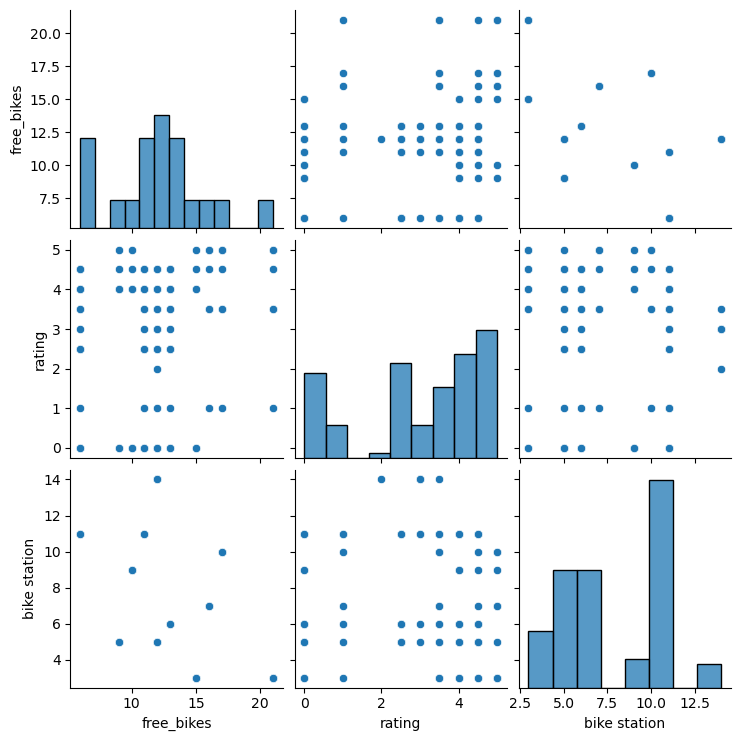

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Visualizations
sns.pairplot(merged_df2[['free_bikes', 'rating', 'bike station']])  
# Pairplot for initial exploration

In [26]:
merged_df2.corr(numeric_only=True)

,review_count,rating,distance,latitude,longitude,bike station,free_bikes,latitude_bike_stations,longitude_bike_stations,rounded_lat_yelp,rounded_long_yelp,rounded_lat,rounded_long
review_count,1.000000,0.160646,-0.052544,-0.078137,-0.123220,0.026946,-0.105799,0.057839,-0.165828,0.056929,-0.179555,0.056929,-0.179555
rating,0.160646,1.000000,0.198500,0.217231,0.234244,-0.037732,0.153294,-0.037726,0.184234,0.008146,0.195535,0.008146,0.195535
distance,-0.052544,0.198500,1.000000,0.712719,0.144122,-0.406745,0.242429,0.226162,0.174636,0.834684,0.211518,0.834684,0.211518
latitude,-0.078137,0.217231,0.712719,1.000000,0.538387,-0.374890,0.328484,0.061733,0.415150,0.515753,0.473450,0.515753,0.473450
longitude,-0.123220,0.234244,0.144122,0.538387,1.000000,-0.199258,0.592039,-0.250173,0.871449,-0.137073,0.944853,-0.137073,0.944853
bike station,0.026946,-0.037732,-0.406745,-0.374890,-0.199258,1.000000,-0.533280,-0.096366,-0.075778,-0.412984,-0.187212,-0.412984,-0.187212
free_bikes,-0.105799,0.153294,0.242429,0.328484,0.592039,-0.533280,1.000000,-0.441184,0.621799,-0.008837,0.662951,-0.008837,0.662951
latitude_bike_stations,0.057839,-0.037726,0.226162,0.061733,-0.250173,-0.096366,-0.441184,1.000000,-0.325119,0.352850,-0.260276,0.352850,-0.260276
longitude_bike_stations,-0.165828,0.184234,0.174636,0.415150,0.871449,-0.075778,0.621799,-0.325119,1.000000,-0.160759,0.928698,-0.160759,0.928698
rounded_lat_yelp,0.056929,0.008146,0.834684,0.515753,-0.137073,-0.412984,-0.008837,0.352850,-0.160759,1.000000,-0.140258,1.000000,-0.140258


In [ ]:
''' 
    Analyze the correlations between 'free_bikes', 'bike station', and 'rating', and focus on those 
    columns using the Pearson correlation coefficient test:

'''

In [34]:
from scipy.stats import pearsonr

# Assuming 'df' contains the relevant columns from your dataset
columns_of_interest = ['free_bikes', 'bike station', 'rating']

# Compute Pearson correlation coefficients for the specified columns
for col1 in columns_of_interest:
    for col2 in columns_of_interest:
        if col1 != col2:
            correlation, p_value = pearsonr(merged_df2[col1], merged_df2[col2])
            print(f"Correlation between '{col1}' and '{col2}': {correlation:.4f}, p-value: {p_value:.4f}")


Correlation between 'free_bikes' and 'bike station': -0.5333, p-value: 0.0000
Correlation between 'free_bikes' and 'rating': 0.1533, p-value: 0.0989
Correlation between 'bike station' and 'free_bikes': -0.5333, p-value: 0.0000
Correlation between 'bike station' and 'rating': -0.0377, p-value: 0.6863
Correlation between 'rating' and 'free_bikes': 0.1533, p-value: 0.0989
Correlation between 'rating' and 'bike station': -0.0377, p-value: 0.6863


 - The 'rating' variable seems to have a moderate correlations with some other features like
   'distance' and 'free_bikes'.
    Depending on your analysis goals, incorporating 'rating' might provide insights into its relationship 



-  Analyze whether the availability of free bikes is influenced by the ratings of restaurants in a specific    location

- Free Bikes and Ratings: There's a weak positive correlation between the number of free bikes and restaurant 
  ratings, indicating a slight tendency for higher-rated restaurants to have more available free bikes.


In [ ]:
# Fill null values with a string category
merged_df2['price'].fillna('#', inplace=True)

# Convert the string category to number category
merged_df2['price'] = merged_df2['price'].astype('category').cat.codes


In [60]:
import statsmodels.api as sm

# Features (independent variables)
X = merged_df2[['price', 'bike station', 'rating', 'distance']]

# Target (dependent variable)
y = merged_df2['free_bikes']

# Add a constant term to the features
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     10.30
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           3.96e-08
Time:                        17:58:50   Log-Likelihood:                -296.12
No. Observations:                 117   AIC:                             604.2
Df Residuals:                     111   BIC:                             620.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.0541      2.284      7.030   


   Since adding variables 'price' and 'distance' have coefficients with high p-values, meaning they might 
   not be statistically significant in explaining the variation in 'free_bikes'. Also, the large condition 
   number suggests potential multicollinearity issues. Therefore I will drop those two variables and keep the rest


In [94]:
import statsmodels.api as sm

# Features (independent variables)
X = merged_df2[[ 'bike station', 'rating']]

# Target (dependent variable)
y = merged_df2['free_bikes']

# Add a constant term to the features
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Store the model results in 'results'
results = model

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     24.68
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.24e-09
Time:                        18:50:41   Log-Likelihood:                -297.37
No. Observations:                 117   AIC:                             600.7
Df Residuals:                     114   BIC:                             609.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.7906      0.957     16.506   

# Interpretation of OLS regression

Regression Results:
- R-squared: The coefficient is 0.302, indicating that approximately 30.2% of the variability in the number of free bikes is explained by the model.
- Adjusted R-squared: It stands at 0.290, slightly lower but still within a reasonable range.

Coefficients and Significance:
- (Intercept): The intercept is 15.7906, representing the predicted value of free_bikes when all other predictors are zero.
- bike_station: For every decrease of 1 unit in bike_station, there's a decrease of around 0.6181 in free_bikes. This variable is statistically significant
- rating: The coefficient is 0.3074. It implies that for every unit increase in rating, there's an expected increase of 0.3074 in free_bikes. 

- F-statistic: This measures the overall significance of the model. A higher F-statistic and a low associated p-value suggest that the model is statistically significant

Interpretation:
- 'bike_station' continues to show a significant negative relationship with 'free_bikes'. More bike stations correlate with fewer available bikes.
- 'rating' shows a slight positive relationship but remains marginally significant (p-value = 0.091). 

In [98]:
from scipy.stats import shapiro

# Assuming 'results' is the variable holding your regression model results
residuals = results.resid
residuals
# Perform Shapiro-Wilk test on the residuals
shapiro_test = shapiro(residuals)

print("Shapiro-Wilk test statistic:", shapiro_test.statistic)
print("Shapiro-Wilk test p-value:", shapiro_test.pvalue)
print("The test statistic is 0.9562, indicating a relatively high value (close to 1).")

Shapiro-Wilk test statistic: 0.956209123134613
Shapiro-Wilk test p-value: 0.0007612612680532038
The test statistic is 0.9562, indicating a relatively high value (close to 1).


In [99]:
residuals = results.resid
residuals

0     -5.083387
1     -1.611142
2     -0.319509
3     -4.929710
4     -1.457465
         ...   
112    3.786519
113    3.940196
114    3.940196
115    4.247550
116    3.940196
Length: 117, dtype: float64

Below there are 4 graphs shows four graphs typically used in regression analysis diagnostics. 

<Axes: ylabel='Count'>

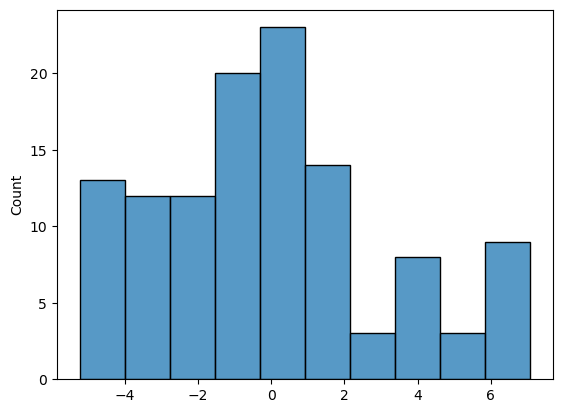

In [101]:
sns.histplot(residuals)


Ideally, residuals should be normally distributed around zero, which would suggest that the model is well-fitted.
In this histogram, the distribution of residuals is somewhat symmetric around zero, but there is a noticeable 
right skew with a tail extending towards larger positive values. This skew could indicate that the model underpredicts for certain observations.

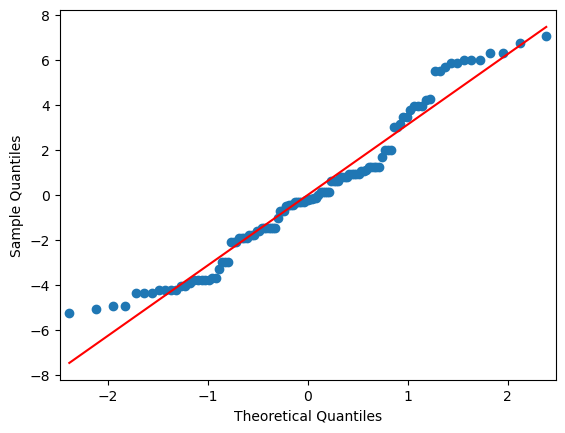

In [102]:
sm.qqplot(residuals, line="r")
plt.show()


In this Q-Q plot, most of the points follow the line closely, especially in the middle quantiles, suggesting that the residuals are approximately normally distributed.

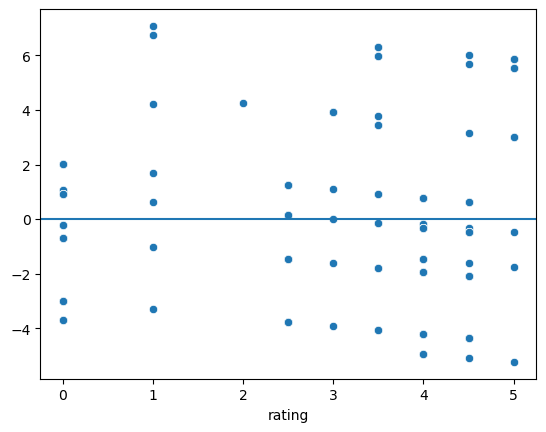

In [106]:
ax = sns.scatterplot(x=merged_df2['rating'], y=residuals)
ax.axhline(0) #horizontal line at 0

There is no clear sign of heteroscedasticity (a situation where the variance of residuals is not constant), which is positive for the regression model's validity.

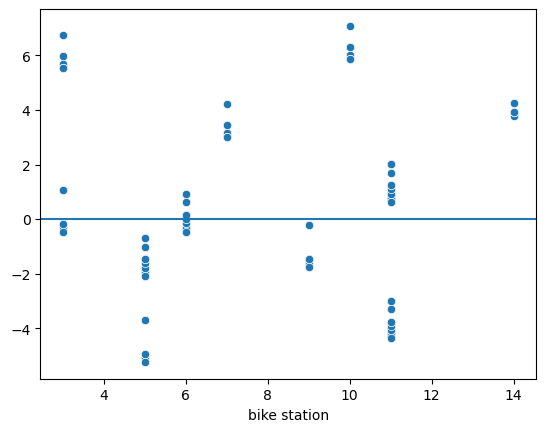

In [107]:
ax = sns.scatterplot(x=merged_df2['bike station'], y=residuals)
ax.axhline(0) #horizontal line at 0

Similar to the previous scatter plot, this one compares the residuals with the bike_station variable.
Again, the residuals appear to be randomly scattered, with no clear pattern, which is good.

In [108]:
import statsmodels.api as sm

# Define the features and target variables
X = merged_df2[['bike station', 'rating']]
y = merged_df2['free_bikes']

# Add a constant term to the features
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid

# Perform the Breusch-Pagan test for heteroscedasticity
stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals, model.model.exog)
print("P-value for residuals:", p)
print("P-value for F-statistic:", f_p)

P-value for residuals: 0.10030483696990718
P-value for F-statistic: 0.10169219932767959


It suggests that there isn't strong evidence to reject the null hypothesis that assumes homoscedasticity. It implies that there isn't significant evidence to suggest the presence of heteroscedasticity 
in the regression model.

Provide model output and an interpretation of the results. 

In [114]:
#Predictions

'''To use the coefficients from your regression model to predict the dependent variable
('free_bikes' in this case), given known values of the independent variables ('bike station', 'rating')
'''

# Extracting coefficients from the regression results
b0 = results.params['const']
b1 = results.params['bike station']
b2 = results.params['rating']

# Known values for independent variables
known_bike_station = 15
known_rating = 4.5

# Predicted value for 'free_bikes'
predicted_free_bikes = b0 + b1 * known_bike_station + b2 * known_rating
predicted_free_bikes

7.90277441284829


        This prediction indicates a positive relationship between ratings and free bike availability, 
    suggesting that higher ratings might correspond to a slightly higher number of available bikes when 
    considering a specific bike station count.
        This prediction suggests that with a 'rating' of 4.5, along with a 'bike_station' count of 15, the model 
    predicts roughly 7.90 free bikes to be available.
        It reinforces the idea that higher ratings might contribute to a higher number of available bikes, 
    holding other variables constant.



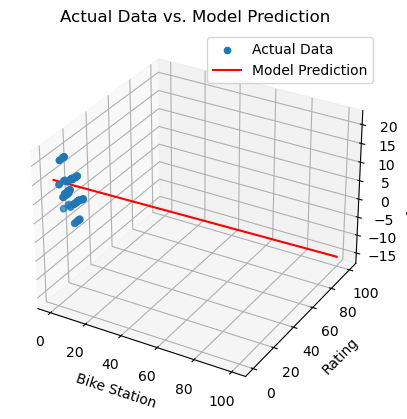

In [117]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Generate new data for 3D plot
new_X = pd.DataFrame({
    'const': [1] * 100,
    'bike_station': np.linspace(start=0, stop=100, num=100),
    'rating': np.linspace(start=0, stop=100, num=100),
})

# Predict using the model
predictions = results.predict(new_X, transform=True)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(merged_df2['bike station'], merged_df2['rating'], merged_df2['free_bikes'], label='Actual Data')

# Plot the predicted values
ax.plot(new_X['bike_station'], new_X['rating'], predictions, color='red', label='Model Prediction')

# Add labels and legend
ax.set_xlabel('Bike Station')
ax.set_ylabel('Rating')
ax.set_zlabel('free_bikes')
ax.legend()
ax.set_title('Actual Data vs. Model Prediction')
plt.show()



    It plots the actual data as points in 3D space and the model's predictions as a curve in red, providing a 
    visual representation of how well the model fits the data in the context of 'bike station', 'rating',
    and 'free bikes'. 
    
